In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#import data for both test and train
flight_train=pd.read_excel('D:/data1/flight.xlsx')
flight_test=pd.read_excel('D:/data1/Test_set.xlsx')

In [3]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
#check shape  for both test and train
flight_train.shape,flight_test.shape


((10683, 11), (2671, 10))

In [6]:
#check for missing values for both test and train
flight_train.isnull().sum(),flight_test.isnull().sum()

(Airline            0
 Date_of_Journey    0
 Source             0
 Destination        0
 Route              1
 Dep_Time           0
 Arrival_Time       0
 Duration           0
 Total_Stops        1
 Additional_Info    0
 Price              0
 dtype: int64,
 Airline            0
 Date_of_Journey    0
 Source             0
 Destination        0
 Route              0
 Dep_Time           0
 Arrival_Time       0
 Duration           0
 Total_Stops        0
 Additional_Info    0
 dtype: int64)

In [7]:
# information of both train and test data
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
flight_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [9]:
# represent data in proper way or cleansing of both train and test data


In [10]:
#drop the null values in train data because it's less than 1%
flight_train.dropna(inplace=True)
flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
# separate date ,time and year for test and train

In [12]:
flight_train['Date_of_Journey'] = pd.to_datetime(flight_train['Date_of_Journey'])

In [13]:
flight_train['day_of_week'] = flight_train['Date_of_Journey'].dt.day_name()

In [14]:
flight_train['day'] = flight_train['Date_of_Journey'].dt.day
flight_train['month'] = flight_train['Date_of_Journey'].dt.month
flight_train.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [15]:
flight_train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_week,day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Sunday,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Saturday,5,1


In [16]:
flight_train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_week,day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Sunday,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Saturday,5,1


In [17]:
flight_test['Date_of_Journey'] = pd.to_datetime(flight_test['Date_of_Journey'])

In [18]:
flight_test['day_of_week'] = flight_test['Date_of_Journey'].dt.day_name()

In [19]:
flight_test['day'] = flight_test['Date_of_Journey'].dt.day
flight_test['month'] = flight_test['Date_of_Journey'].dt.month
flight_test.drop(["Date_of_Journey"], axis = 1, inplace = True)


In [20]:
flight_test.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day_of_week,day,month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,Thursday,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,Thursday,5,12


In [21]:
#divide day or night flight based on Dep_Time time for both test and train data

In [22]:
flight_train["Dep_hour"] = pd.to_datetime(flight_train["Dep_Time"]).dt.hour
flight_train["Dep_min"] = pd.to_datetime(flight_train["Dep_Time"]).dt.minute
flight_train.drop(["Dep_Time"], axis = 1, inplace = True)


In [23]:
def filter_in_flight(Dep_hour):
    if Dep_hour >=5 and Dep_hour <= 11:
        return "morning flight"
    elif Dep_hour > 11 and Dep_hour <= 16:
        return "afternoon flight"
    elif Dep_hour > 16 and Dep_hour <=19:
        return "evening flight"
    else:
        return "Night flight"

In [24]:
flight_train['flight_type']=flight_train['Dep_hour'].apply(filter_in_flight)

In [25]:
flight_train.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_week,day,month,Dep_hour,Dep_min,flight_type
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,Sunday,24,3,22,20,Night flight
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,Saturday,5,1,5,50,morning flight


In [26]:
flight_test["Dep_hour"] = pd.to_datetime(flight_test["Dep_Time"]).dt.hour
flight_test["Dep_min"] = pd.to_datetime(flight_test["Dep_Time"]).dt.minute
flight_test.drop(["Dep_Time"], axis = 1, inplace = True)


In [27]:
flight_test['flight_type']=flight_test['Dep_hour'].apply(filter_in_flight)

In [28]:
flight_test.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,day_of_week,day,month,Dep_hour,Dep_min,flight_type
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,Thursday,6,6,17,30,evening flight
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,Thursday,5,12,6,20,morning flight


In [29]:
#separate hour and minute for arival_time for both train and test data

In [30]:
flight_train["Arriv_hour"] = pd.to_datetime(flight_train["Arrival_Time"]).dt.hour        # for train data
flight_train["Arriv_min"] = pd.to_datetime(flight_train["Arrival_Time"]).dt.minute
flight_train.drop(["Arrival_Time"], axis = 1, inplace = True)


In [31]:
flight_train.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_week,day,month,Dep_hour,Dep_min,flight_type,Arriv_hour,Arriv_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,Sunday,24,3,22,20,Night flight,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,Saturday,5,1,5,50,morning flight,13,15


In [32]:
flight_test["Arriv_hour"] = pd.to_datetime(flight_test["Arrival_Time"]).dt.hour           # for test data
flight_test["Arriv_min"] = pd.to_datetime(flight_test["Arrival_Time"]).dt.minute
flight_test.drop(["Arrival_Time"], axis = 1, inplace = True)


In [33]:
flight_test.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,day_of_week,day,month,Dep_hour,Dep_min,flight_type,Arriv_hour,Arriv_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,Thursday,6,6,17,30,evening flight,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,Thursday,5,12,6,20,morning flight,10,20


In [34]:
flight_train['Duration']=  flight_train['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [35]:
flight_train.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_week,day,month,Dep_hour,Dep_min,flight_type,Arriv_hour,Arriv_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,Sunday,24,3,22,20,Night flight,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,Saturday,5,1,5,50,morning flight,13,15


In [36]:
flight_test['Duration']=  flight_test['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [37]:
flight_test.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,day_of_week,day,month,Dep_hour,Dep_min,flight_type,Arriv_hour,Arriv_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,Thursday,6,6,17,30,evening flight,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,Thursday,5,12,6,20,morning flight,10,20


In [38]:
#seprate the route data and fix it up in proper way

In [39]:
flight_train['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BLR → HBX → BOM → AMD → DEL       1
BOM → VNS → DEL → HYD             1
BOM → UDR → DEL → HYD             1
BOM → BBI → HYD                   1
BOM → JAI → DEL → HYD             1
Name: Route, Length: 128, dtype: int64

In [40]:
flight_train['Route1']=flight_train['Route'].str.split(" → ").str[0]

In [41]:
flight_train['Route2']=flight_train['Route'].str.split(" → ").str[1]
flight_train['Route3']=flight_train['Route'].str.split(" → ").str[2]
flight_train['Route4']=flight_train['Route'].str.split(" → ").str[3]
flight_train['Route5']=flight_train['Route'].str.split(" → ").str[4]
flight_train.drop(["Route"], axis = 1, inplace = True)


In [42]:
flight_train.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day_of_week,day,month,Dep_hour,Dep_min,flight_type,Arriv_hour,Arriv_min,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,170,non-stop,No info,3897,Sunday,24,3,22,20,Night flight,1,10,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,445,2 stops,No info,7662,Saturday,5,1,5,50,morning flight,13,15,CCU,IXR,BBI,BLR,NaN


In [43]:
flight_train['Route1'].fillna("None",inplace=True)
flight_train['Route2'].fillna("None",inplace=True)
flight_train['Route3'].fillna("None",inplace=True)
flight_train['Route4'].fillna("None",inplace=True)
flight_train['Route5'].fillna("None",inplace=True)

In [44]:
flight_train.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day_of_week,day,month,Dep_hour,Dep_min,flight_type,Arriv_hour,Arriv_min,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,170,non-stop,No info,3897,Sunday,24,3,22,20,Night flight,1,10,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,445,2 stops,No info,7662,Saturday,5,1,5,50,morning flight,13,15,CCU,IXR,BBI,BLR,None


In [45]:
flight_test['Route1']=flight_test['Route'].str.split(" → ").str[0]
flight_test['Route2']=flight_test['Route'].str.split(" → ").str[1]
flight_test['Route3']=flight_test['Route'].str.split(" → ").str[2]
flight_test['Route4']=flight_test['Route'].str.split(" → ").str[3]
flight_test['Route5']=flight_test['Route'].str.split(" → ").str[4]
flight_test.drop(["Route"], axis = 1, inplace = True)


In [46]:
flight_test['Route1'].fillna("None",inplace=True)
flight_test['Route2'].fillna("None",inplace=True)
flight_test['Route3'].fillna("None",inplace=True)
flight_test['Route4'].fillna("None",inplace=True)
flight_test['Route5'].fillna("None",inplace=True)

In [47]:
flight_test.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,day_of_week,day,month,Dep_hour,Dep_min,flight_type,Arriv_hour,Arriv_min,Route1,Route2,Route3,Route4,Route5
0,Jet Airways,Delhi,Cochin,655,1 stop,No info,Thursday,6,6,17,30,evening flight,4,25,DEL,BOM,COK,None,None
1,IndiGo,Kolkata,Banglore,240,1 stop,No info,Thursday,5,12,6,20,morning flight,10,20,CCU,MAA,BLR,None,None


In [48]:
# making useful insight from train data

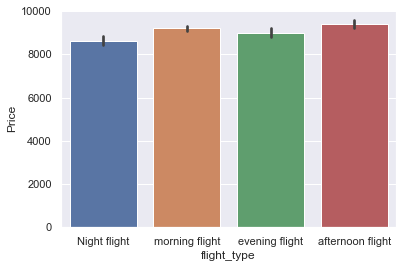

In [49]:
sns.barplot(x="flight_type",y="Price",data=flight_train)
plt.show()

In [50]:
#from this we can see that afternoon flight,morning price is more compare than other.

Text(0, 0.5, 'days')

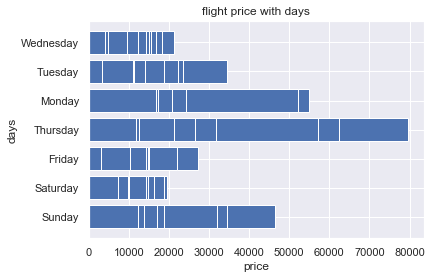

In [51]:
plt.barh(flight_train['day_of_week'],flight_train['Price'])
plt.title("flight price with days")
plt.xlabel("price")
plt.ylabel('days')

In [52]:
# from this graph we can recognize thrush day,monday and sunday flight price is more compare to other days

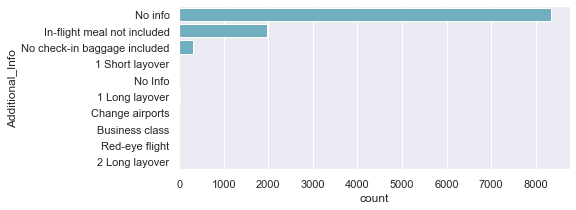

In [53]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="Additional_Info", data=flight_train, color="c")

In [54]:
#from this graph we can see most of the people having no information

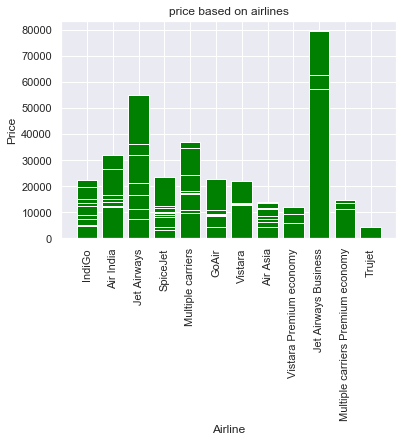

In [55]:
plt.bar("Airline", "Price", data = flight_train, color = "green")
plt.xlabel("Airline")
plt.xticks(rotation = 90)
plt.ylabel("Price")
plt.title("price based on airlines")
plt.show()

In [56]:
#here we can analysis price of flight in jet airways is more compare than others

In [57]:
#statestical analysis and checking for outliers on train data

In [58]:
flight_train.describe(include='all')

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day_of_week,day,month,Dep_hour,Dep_min,flight_type,Arriv_hour,Arriv_min,Route1,Route2,Route3,Route4,Route5
count,10682,10682,10682,10682.000000,10682,10682,10682.000000,10682,10682.000000,10682.000000,10682.000000,10682.000000,10682,10682.000000,10682.000000,10682,10682,10682,10682,10682
unique,12,5,6,NaN,5,10,NaN,7,NaN,NaN,NaN,NaN,4,NaN,NaN,5,40,27,12,6
top,Jet Airways,Delhi,Cochin,NaN,1 stop,No info,NaN,Thursday,NaN,NaN,NaN,NaN,morning flight,NaN,NaN,DEL,BOM,None,None,None
freq,3849,4536,4536,NaN,5625,8344,NaN,2290,NaN,NaN,NaN,NaN,4911,NaN,NaN,4536,3867,3491,9116,10636
mean,NaN,NaN,NaN,643.020502,NaN,NaN,9087.214567,NaN,12.682925,5.534731,12.491013,24.409287,NaN,13.349186,24.690601,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,507.830133,NaN,NaN,4611.548810,NaN,8.803800,2.987626,5.748820,18.767801,NaN,6.859317,16.506808,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,5.000000,NaN,NaN,1759.000000,NaN,3.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,170.000000,NaN,NaN,5277.000000,NaN,5.000000,3.000000,8.000000,5.000000,NaN,8.000000,10.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,520.000000,NaN,NaN,8372.000000,NaN,6.000000,5.000000,11.000000,25.000000,NaN,14.000000,25.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,930.000000,NaN,NaN,12373.000000,NaN,21.000000,6.000000,18.000000,40.000000,NaN,19.000000,35.000000,NaN,NaN,NaN,NaN,NaN


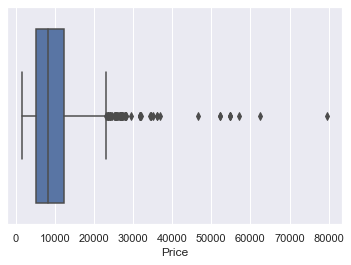

In [59]:
sns.boxplot(flight_train['Price'])

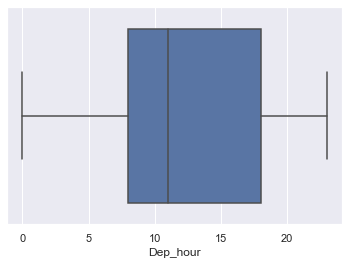

In [60]:
sns.boxplot(flight_train['Dep_hour'])

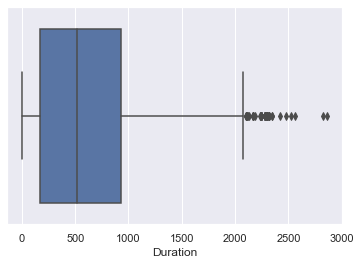

In [61]:
sns.boxplot(flight_train['Duration'])

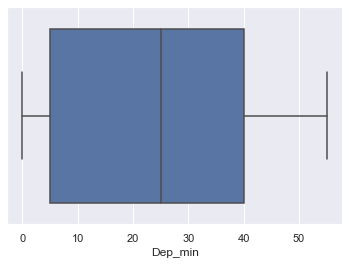

In [62]:
sns.boxplot(flight_train['Dep_min'])

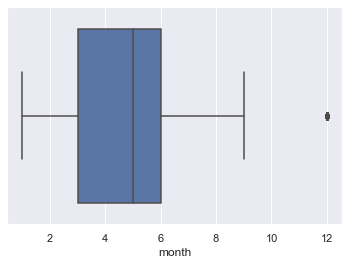

In [63]:
sns.boxplot(flight_train['month'])

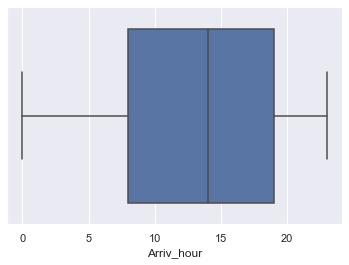

In [64]:
sns.boxplot(flight_train['Arriv_hour'])

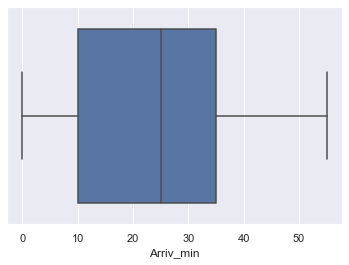

In [65]:
sns.boxplot(flight_train['Arriv_min'])

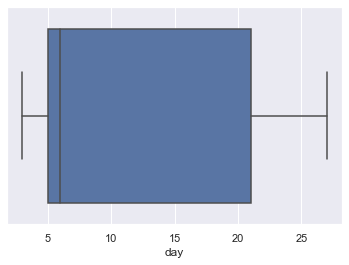

In [66]:
sns.boxplot(flight_train['day'])

In [67]:
# we are keeping those outliers because those outliers having some meaningful insight

In [68]:
y = flight_train['Price']
X =flight_train.drop(columns = ['Price'])

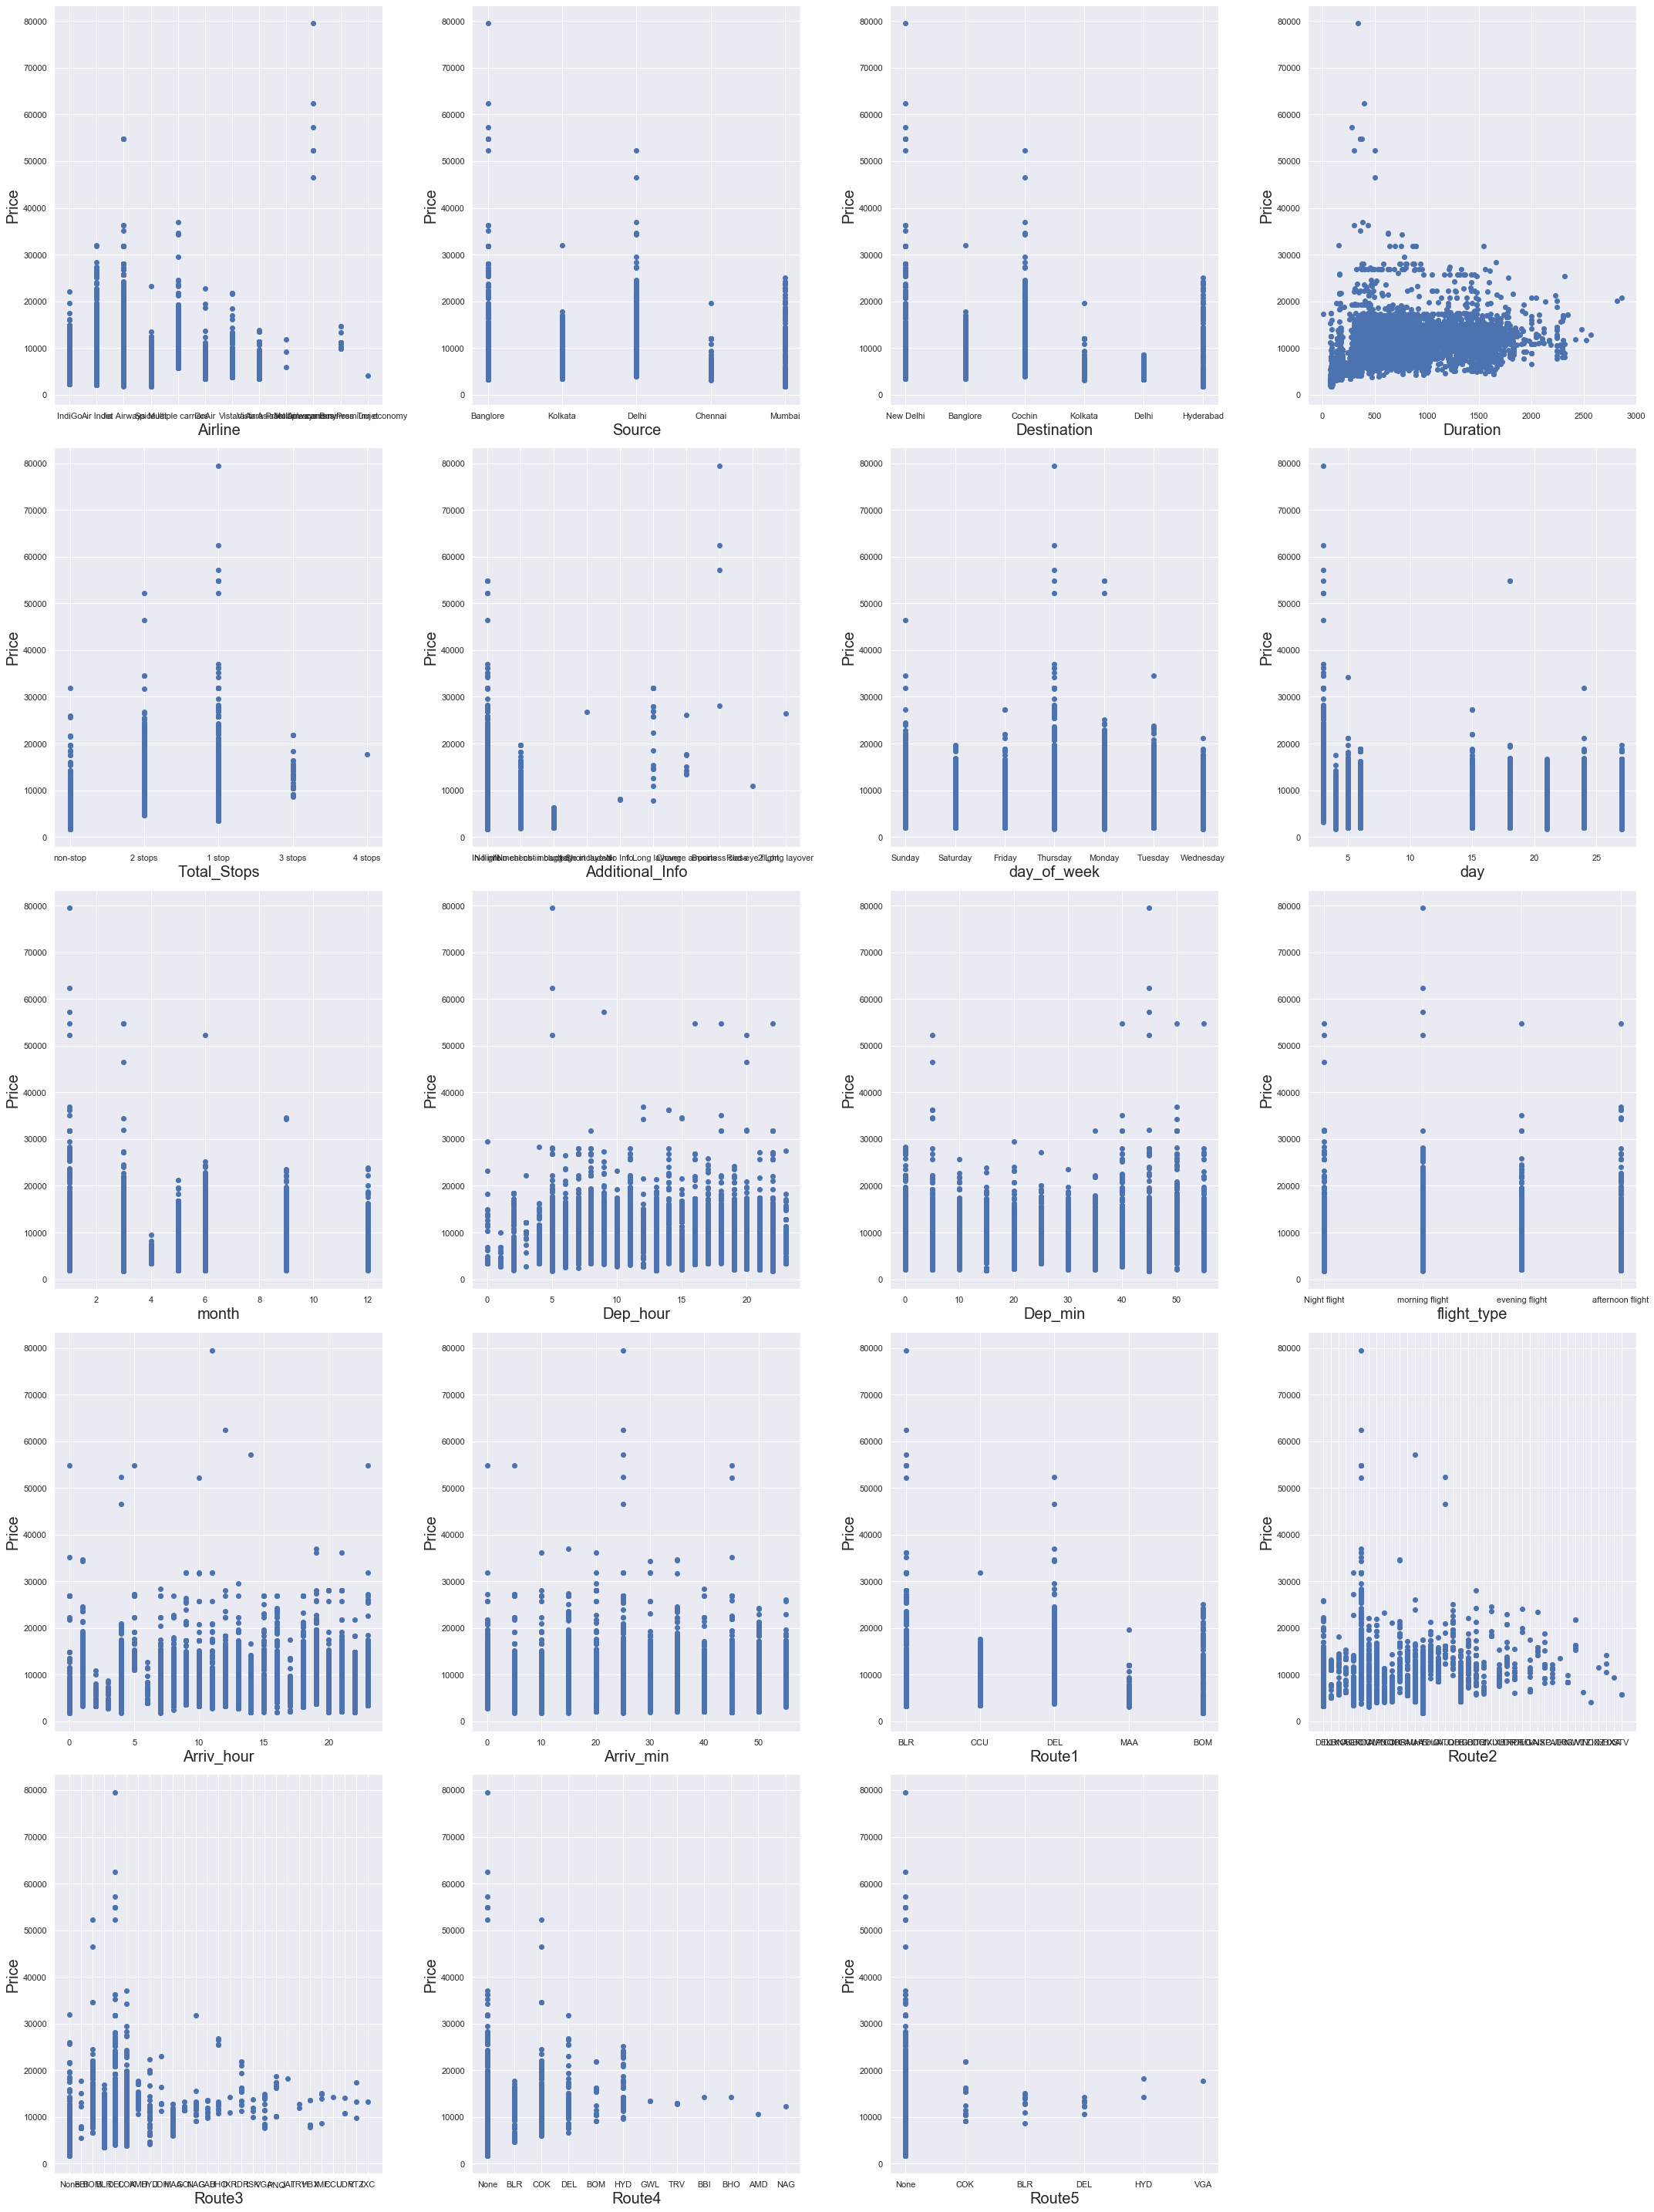

In [69]:
plt.figure(figsize=(30,40), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=20 :
        ax = plt.subplot(5,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [70]:
# here we can notice that there is a linear relationship between dependent and independent variable

In [71]:
#checking for corelation value

In [72]:
flight_train.corr()

,Duration,Price,day,month,Dep_hour,Dep_min,Arriv_hour,Arriv_min
Duration,1.000000,0.506480,-0.038360,0.055136,0.002088,-0.019099,0.051531,-0.069663
Price,0.506480,1.000000,-0.165448,0.010705,0.006799,-0.024458,0.024244,-0.086155
day,-0.038360,-0.165448,1.000000,-0.264896,-0.002301,-0.016433,-0.002176,-0.021423
month,0.055136,0.010705,-0.264896,1.000000,0.028189,0.002136,-0.004329,-0.025786
Dep_hour,0.002088,0.006799,-0.002301,0.028189,1.000000,-0.024745,0.005180,0.067911
Dep_min,-0.019099,-0.024458,-0.016433,0.002136,-0.024745,1.000000,0.043122,-0.017597
Arriv_hour,0.051531,0.024244,-0.002176,-0.004329,0.005180,0.043122,1.000000,-0.154363
Arriv_min,-0.069663,-0.086155,-0.021423,-0.025786,0.067911,-0.017597,-0.154363,1.000000


In [73]:
# check for multi colinearity

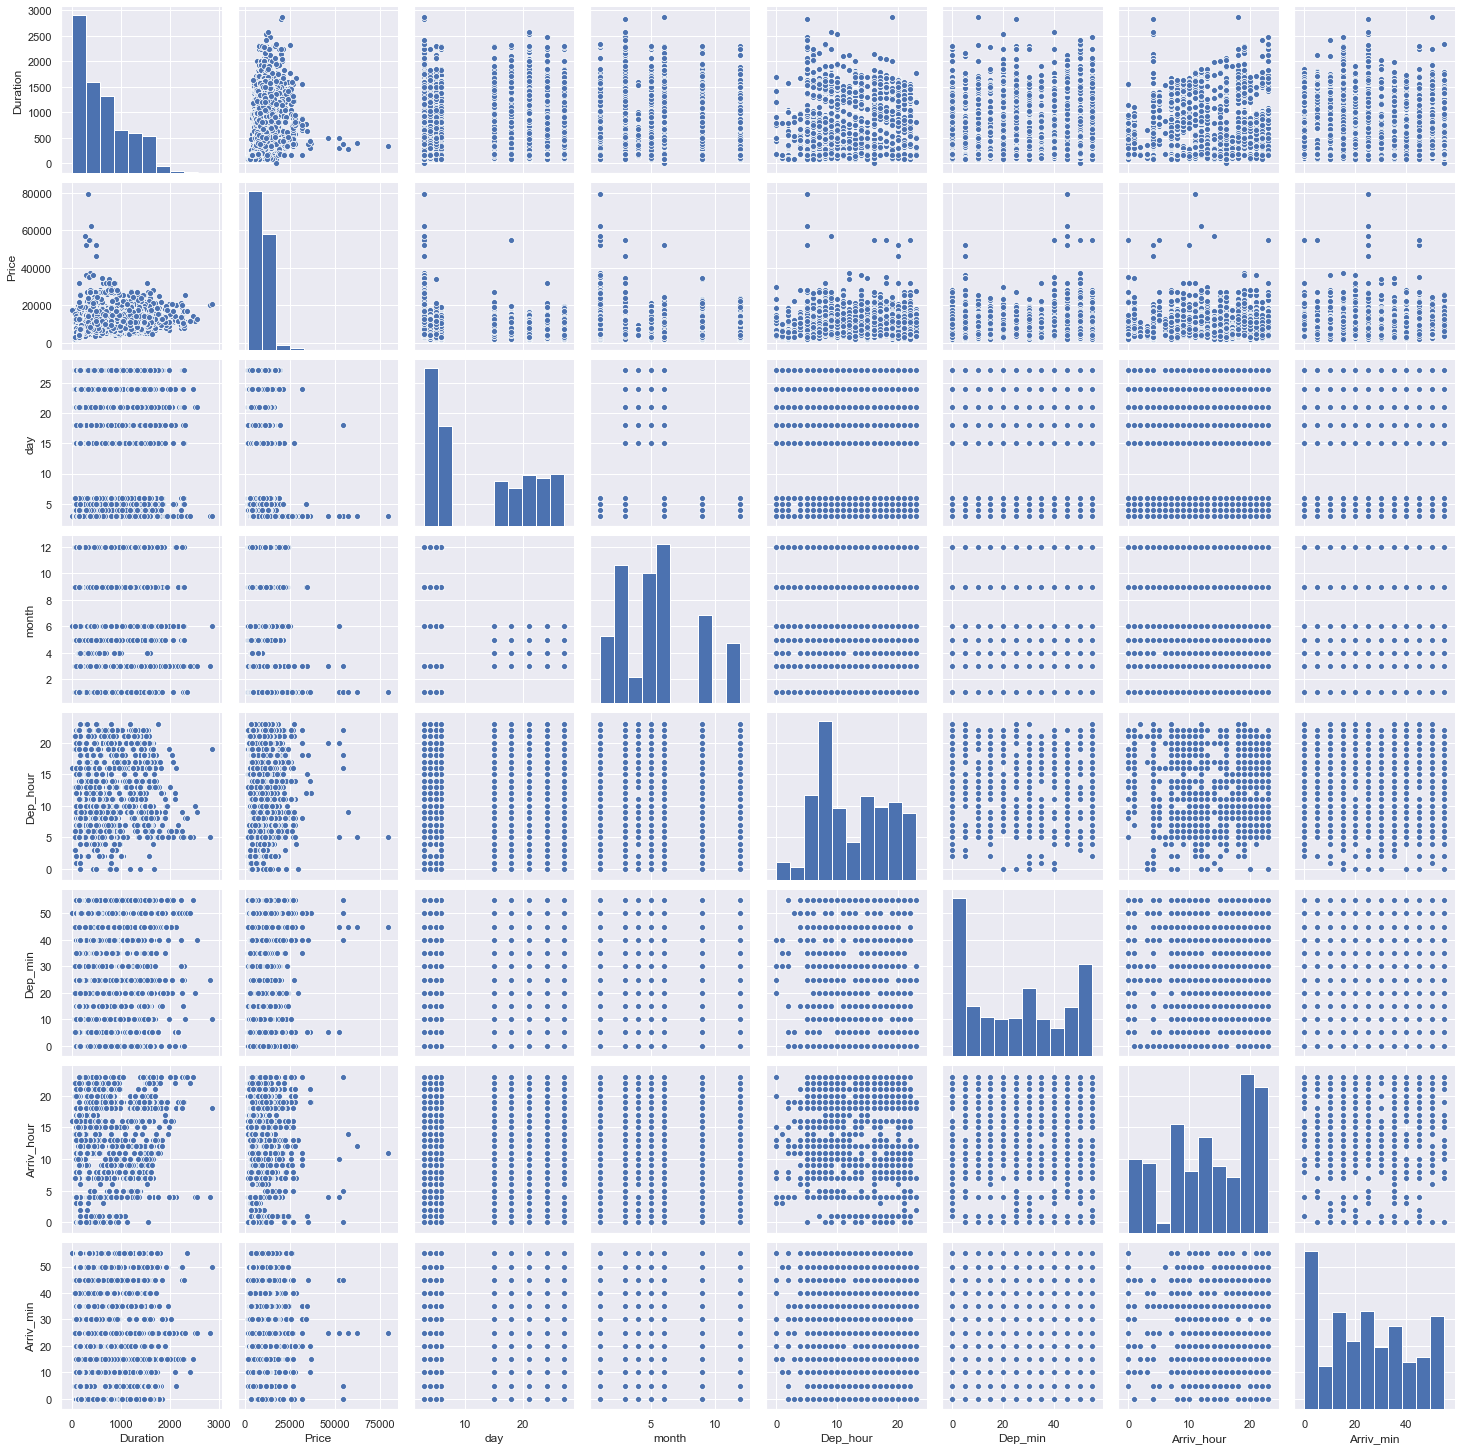

In [74]:
sns.pairplot(flight_train, kind="scatter")

In [75]:
# use label encoding method to convert categorical  variable into numeric for both train and test data

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
flight_c=['Airline','Source','Destination','Total_Stops','Additional_Info','day_of_week','flight_type','Route1','Route2','Route3','Route4','Route5']

In [78]:
encoder=LabelEncoder()
encoded=flight_train[flight_c].apply(encoder.fit_transform)


In [79]:
encoded.head(4)

,Airline,Source,Destination,Total_Stops,Additional_Info,day_of_week,flight_type,Route1,Route2,Route3,Route4,Route5
0,3,0,5,4,8,3,0,0,10,21,10,4
1,1,3,0,1,8,2,3,2,20,1,3,4
2,4,2,1,1,8,0,3,3,27,4,5,4
3,3,3,0,0,8,4,2,2,29,3,10,4


In [80]:
flight_train=flight_train.drop(['Airline','Source','Destination','Total_Stops','Additional_Info','day_of_week','flight_type','Route1','Route2','Route3','Route4','Route5'],axis=1)

In [81]:
flight_train.head(2)

,Duration,Price,day,month,Dep_hour,Dep_min,Arriv_hour,Arriv_min
0,170,3897,24,3,22,20,1,10
1,445,7662,5,1,5,50,13,15


In [82]:
flight_f=encoded.join(flight_train)

In [83]:
flight_f.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,day_of_week,flight_type,Route1,Route2,Route3,Route4,Route5,Duration,Price,day,month,Dep_hour,Dep_min,Arriv_hour,Arriv_min
0,3,0,5,4,8,3,0,0,10,21,10,4,170,3897,24,3,22,20,1,10
1,1,3,0,1,8,2,3,2,20,1,3,4,445,7662,5,1,5,50,13,15


In [84]:
encoder=LabelEncoder()
encoded1=flight_test[flight_c].apply(encoder.fit_transform)


In [85]:
encoded1.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,day_of_week,flight_type,Route1,Route2,Route3,Route4,Route5
0,4,2,1,0,5,4,2,3,6,5,6,3
1,3,3,0,0,5,4,3,2,24,3,6,3


In [86]:
flight_test=flight_test.drop(['Airline','Source','Destination','Total_Stops','Additional_Info','day_of_week','flight_type','Route1','Route2','Route3','Route4','Route5'],axis=1)

In [87]:
flight_test.head(2)

,Duration,day,month,Dep_hour,Dep_min,Arriv_hour,Arriv_min
0,655,6,6,17,30,4,25
1,240,5,12,6,20,10,20


In [88]:
flight_f1=encoded1.join(flight_test)

In [89]:
flight_f1.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,day_of_week,flight_type,Route1,Route2,Route3,Route4,Route5,Duration,day,month,Dep_hour,Dep_min,Arriv_hour,Arriv_min
0,4,2,1,0,5,4,2,3,6,5,6,3,655,6,6,17,30,4,25
1,3,3,0,0,5,4,3,2,24,3,6,3,240,5,12,6,20,10,20


In [90]:
flight_f1.tail(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,day_of_week,flight_type,Route1,Route2,Route3,Route4,Route5,Duration,day,month,Dep_hour,Dep_min,Arriv_hour,Arriv_min
2666,1,3,0,0,5,4,0,2,10,3,6,3,1435,6,6,20,30,20,25
2667,3,3,0,4,5,6,1,2,5,18,6,3,155,27,3,14,20,16,55
2668,4,2,1,0,5,1,0,3,6,5,6,3,395,3,6,21,50,4,25
2669,1,2,1,0,5,1,0,3,6,5,6,3,915,3,6,4,0,19,15
2670,6,2,1,0,5,2,0,3,6,5,6,3,860,15,6,4,55,19,15


In [91]:
flight_f1['Total_Stops'].value_counts()

0    1431
4     849
1     379
2      11
3       1
Name: Total_Stops, dtype: int64

In [92]:
# checking for vif values

In [93]:
y1= flight_f['Price']
X1=flight_f.drop(columns = ['Price'])

In [94]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X1)

In [95]:
X_scaled

array([[-0.41080484, -1.65835945,  2.41653414, ..., -0.2349499 ,
        -1.80043628, -0.8900139 ],
       [-1.26115217,  0.89001433, -0.97381203, ...,  1.36360731,
        -0.05090913, -0.5870944 ],
       [ 0.01436882,  0.04055641, -0.2957428 , ...,  0.0314763 ,
        -1.3630545 ,  0.0187446 ],
       ...,
       [ 0.01436882, -1.65835945,  0.38232644, ..., -0.2349499 ,
        -0.34249699, -0.2841749 ],
       [ 2.56541078, -1.65835945,  2.41653414, ...,  0.2979025 ,
         0.0948848 , -0.8900139 ],
       [-1.26115217,  0.04055641, -0.2957428 , ...,  1.63003351,
         0.82385444, -0.5870944 ]])

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled


In [97]:
vif = pd.DataFrame()

In [98]:
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

In [99]:
vif["Features"] = X1.columns

In [100]:
vif

,VIF,Features
0,1.122606,Airline
1,1.688440,Source
2,1.948040,Destination
3,13.259355,Total_Stops
4,1.085254,Additional_Info
5,1.013810,day_of_week
6,1.710371,flight_type
7,1.721244,Route1
8,1.147909,Route2
9,14.232999,Route3


In [101]:
y1= flight_f['Price']
X1=flight_f.drop(columns = ['Price'])

In [102]:
X1.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,day_of_week,flight_type,Route1,Route2,Route3,Route4,Route5,Duration,day,month,Dep_hour,Dep_min,Arriv_hour,Arriv_min
0,3,0,5,4,8,3,0,0,10,21,10,4,170,24,3,22,20,1,10
1,1,3,0,1,8,2,3,2,20,1,3,4,445,5,1,5,50,13,15
2,4,2,1,1,8,0,3,3,27,4,5,4,1140,6,9,9,25,4,25
3,3,3,0,0,8,4,2,2,29,3,10,4,325,5,12,18,5,23,30
4,3,0,5,0,8,4,1,0,29,7,10,4,285,3,1,16,50,21,35


In [103]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X1)

In [104]:
#split data into tyrain and test

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
x_train,x_test,y_train,y_test = train_test_split(X1,y1,test_size = 0.25,random_state=355)

In [107]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
print(lm.intercept_)


23036.947661295446


In [109]:
print(lm.coef_)

[ 1.46023562e+02 -1.46006302e+02  5.23144765e+02 -8.28618740e+02
  1.86692866e+02 -5.25826157e+01 -1.25428197e+00 -2.63313336e+02
 -1.08859020e+02 -1.71516625e+02 -6.37200275e+02 -1.22243979e+03
  8.29873835e-01 -7.85214847e+01 -1.00345974e+02  2.79819180e+01
 -2.81365722e+00 -1.15749895e+01  1.30974286e+00]


In [110]:
preds = lm.predict(x_test)
preds

array([14330.26749758, 12727.5634806 ,  2916.77138067, ...,
       11695.71952234, 10417.65678348,  3019.17317493])

In [111]:
lm.score(x_train,y_train)

0.48495315405861056

In [112]:
def adj_r2(x,y):
    r2 =lm.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [113]:
adj_r2(x_train,y_train)

0.48372854010880617

In [114]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.09762634, 5.60859557, 9.43016299, 5.47014571, 3.08754799,
       8.95896268, 8.29251872, 0.56653891, 3.23352626, 9.02402259,
       0.53818872, 5.37468691, 4.71833253, 4.40455881, 6.05795455,
       2.37804661, 9.7372383 , 2.21806809, 8.14857309, 2.99002721,
       7.22933767, 0.10995496, 7.7177917 , 2.88821216, 1.54141785,
       2.40073012, 3.00227598, 9.11957232, 5.88913422, 7.44324022,
       9.69203098, 9.02683874, 4.42071228, 2.60449019, 0.93736077,
       8.3795929 , 2.46386158, 3.49509172, 8.73131335, 5.67800712,
       7.16650837, 8.68307604, 7.99343808, 2.27095589, 0.95363876,
       3.74015216, 7.46248648, 7.53539885, 0.32633667, 8.09568095]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [115]:
ridgecv.alpha_

0.09762634118297586

In [116]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.09762634118297586, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [117]:
ridge_model.score(x_test, y_test)

0.4916453401776075

In [118]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [119]:
alpha = lasscv.alpha_
alpha

0.07450882770654071

In [120]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.07450882770654071, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [121]:
lasso_reg.score(x_test, y_test)

0.491650018757681

In [122]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)# RidgeCV will return best alpha and coefficients after performing 10 cross validations.

elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [123]:
elasticCV.alpha_

2367.4476861790927

In [124]:
elasticCV.l1_ratio

0.5

In [125]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=2367.4476861790927, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [126]:
elasticnet_reg.score(x_test, y_test)

0.26442515859253923

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [128]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(x_train, y_train )

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [129]:
y_train_pred =ridge_regressor.predict(x_train) ##Predict train result
y_test_pred =ridge_regressor.predict(x_test) ##Predict test result

In [130]:
print("Train Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  3318.9625025146784
Mean absolute % error:  30.0
R-squared:  0.4822156575622919


In [131]:

params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =15,scoring = 'neg_mean_absolute_error', n_jobs =-1)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=15, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [132]:
y_train_pred =lasso_regressor.predict(x_train) ##Predict train result
y_test_pred =lasso_regressor.predict(x_test) ##Predict test result

In [133]:
print("Train Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  3310.7160917579145
Mean absolute % error:  30.0
R-squared:  0.48478547137787653


In [134]:
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv =10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [135]:
y_train_pred =knn_regressor.predict(x_train) ##Predict train result
y_test_pred =knn_regressor.predict(x_test) ##Predict test result

In [136]:
print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))


Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  2323.288268043319
Mean absolute % error:  14.0
R-squared:  0.7462825016790211


In [137]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23,

In [138]:
y_train_pred =tree.predict(x_train) ##Predict train result
y_test_pred =tree.predict(x_test) ##Predict test result

In [139]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  583.9003650807666
Mean absolute % error:  3.0
R-squared:  0.983974126311875


In [140]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  2299.625506984639
Mean absolute % error:  9.0
R-squared:  0.7509257841305317


In [141]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [142]:
y_train_pred = random_regressor.predict(x_train)
y_test_pred = random_regressor.predict(x_test)


In [143]:
print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  630.4290263548532
Mean absolute % error:  3.0
R-squared:  0.981318290114692


In [144]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  1704.4001082189905
Mean absolute % error:  7.0
R-squared:  0.8631774614945021


In [145]:
x_train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'day_of_week', 'flight_type', 'Route1', 'Route2', 'Route3', 'Route4',
       'Route5', 'Duration', 'day', 'month', 'Dep_hour', 'Dep_min',
       'Arriv_hour', 'Arriv_min'],
      dtype='object')

In [146]:
import pickle
# open a file, where you ant to store the data
file = open('random_regressor.pkl', 'wb')

# dump information to that file
pickle.dump(random_regressor, file)

In [147]:
model = open('random_regressor.pkl','rb')
forest = pickle.load(model)

In [148]:
forest.predict(x_test)

array([16270.94   , 13248.045  ,  3425.79   , ...,  8911.91625,
       11369.63   ,  5907.415  ])

In [150]:
x_test.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'day_of_week', 'flight_type', 'Route1', 'Route2', 'Route3', 'Route4',
       'Route5', 'Duration', 'day', 'month', 'Dep_hour', 'Dep_min',
       'Arriv_hour', 'Arriv_min'],
      dtype='object')

In [163]:
def fun(df):

    

In [165]:
 apply(pd.value_counts)

,Airline,Source,Destination,Total_Stops,Additional_Info,day_of_week,flight_type,Route1,Route2,Route3,Route4,Route5,Duration,day,month,Dep_hour,Dep_min,Arriv_hour,Arriv_min
0,65.0,541.0,723.0,1385.0,6.0,464.0,558.0,541.0,64.0,11.0,1.0,4.0,NaN,NaN,NaN,16.0,532.0,86.0,351.0
1,458.0,106.0,1116.0,386.0,NaN,374.0,490.0,185.0,10.0,5.0,1.0,6.0,NaN,NaN,270.0,8.0,NaN,150.0,NaN
2,40.0,1116.0,302.0,17.0,NaN,301.0,413.0,723.0,26.0,2.0,1.0,6.0,NaN,NaN,NaN,46.0,NaN,20.0,NaN
3,531.0,723.0,185.0,NaN,1.0,268.0,1210.0,1116.0,9.0,455.0,80.0,1.0,NaN,332.0,546.0,8.0,NaN,16.0,NaN
4,943.0,185.0,106.0,883.0,1.0,565.0,NaN,106.0,15.0,271.0,6.0,2654.0,NaN,152.0,109.0,49.0,NaN,198.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
one=flight_f1.head(1)
one